In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_pickle("../../data/processed/balanced_df.pkl")

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [3]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [4]:
print(type(X_train))
print(X_train.head())

<class 'pandas.core.series.Series'>
195074                                                  nan
19952     norway foreign minister becomes president of w...
8874      us legislators to call for release of american...
29950     president obama is putting an end to inhumane ...
55935                                                   nan
Name: text, dtype: object


In [5]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [6]:
# Only if you want to remove literal "nan" strings too
mask = X_train != 'nan'
X_train = X_train[mask]
y_train = y_train[mask]

In [7]:
X_train.head()

19952    norway foreign minister becomes president of w...
8874     us legislators to call for release of american...
29950    president obama is putting an end to inhumane ...
20097    cambodia suspends cooperation with us in findi...
8601     russia to us trump sort out your own preelecti...
Name: text, dtype: object

In [ ]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.9,
    min_df=2,
    ngram_range=(1,2),
    max_features=50000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_tfidf, y_train)


In [ ]:
y_pred = nb.predict(X_test_tfidf)

              precision    recall  f1-score   support

        FAKE       0.54      0.99      0.70     17023
        REAL       0.93      0.15      0.26     17023

    accuracy                           0.57     34046
   macro avg       0.73      0.57      0.48     34046
weighted avg       0.73      0.57      0.48     34046



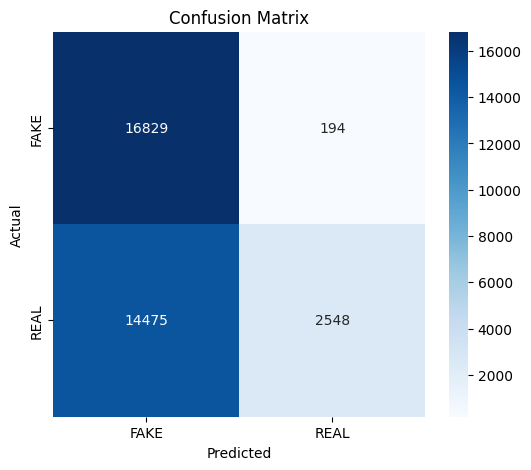

In [ ]:
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()